# Motive is to :
1) Observe properties of different stocks from same/different sectors (histogram, qqplot, 95% CI width)
2) Prove weak stationarity of the stocks (mean, variance, and ACF correlogram)

In [ ]:
# Import necessary packages
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import datetime
import numpy as np

# package required for QQ plot
import scipy.stats as stats

In [9]:
# Period of stock data comparison ( economy crisis 2008 in specific)
start_date = '2007-01-01'
end_date = '2010-12-31'

#Stocks from Healthcare sector, Health Care Equipment sub industry
#(ABT) stock symbol of a healthcare sector in SP500 that has been through the 2008 recession
#(ABMD) another stock symbol of a healthcare sector in SP500 that has been through the 2008 recession for comparison
#(A) another stock symbol of a healthcare sector in SP500 that has been through the 2008 recession for comparison

#Stocks from Material sector
#(GLD) a stock symbol of material sector

ABT =data.DataReader('ABT', 'yahoo', start_date, end_date)
ABMD =data.DataReader('ABMD', 'yahoo', start_date, end_date)
A =data.DataReader('A', 'yahoo', start_date, end_date)
GLD =data.DataReader('GLD', 'yahoo', start_date, end_date)

In [10]:
# Concatenate stock symbols datas with matching dates
symbol_data=[ABT, ABMD, A, GLD]
symbols=['ABT', 'ABMD', 'A', 'GLD']
all_data=pd.concat(symbol_data, keys=symbols, names=['Symbol','Date'])

In [11]:
# Displays first few data of stock(should be data of ABT since it is the first in the symbol list )
all_data.head()

High        Low       Open      Close      Volume  \
Symbol Date                                                                 
ABT    2007-01-03  23.745302  23.390249  23.428635  23.495806  11214800.0   
       2007-01-04  24.105152  23.495806  23.538988  23.942020  21185400.0   
       2007-01-05  23.990000  23.639746  23.942020  23.942020  14649800.0   
       2007-01-08  24.052374  23.817272  23.903637  24.028383  12734600.0   
       2007-01-09  24.306667  23.990000  24.061970  24.239496  16969100.0   

                   Adj Close  
Symbol Date                   
ABT    2007-01-03  16.950293  
       2007-01-04  17.272202  
       2007-01-05  17.272202  
       2007-01-08  17.334503  
       2007-01-09  17.486803

In [12]:
# Displays last few data of stock(should be data of GLD since it is the last in the symbol list )
all_data.tail()

High         Low        Open       Close      Volume  \
Symbol Date                                                                     
GLD    2010-12-27  135.059998  134.490005  134.960007  135.020004   3436400.0   
       2010-12-28  137.339996  136.619995  136.850006  137.220001  10111800.0   
       2010-12-29  138.050003  137.190002  137.380005  137.710007   8442300.0   
       2010-12-30  137.710007  136.940002  137.580002  137.029999   5749400.0   
       2010-12-31  138.770004  137.720001  137.779999  138.720001   9219800.0   

                    Adj Close  
Symbol Date                    
GLD    2010-12-27  135.020004  
       2010-12-28  137.220001  
       2010-12-29  137.710007  
       2010-12-30  137.029999  
       2010-12-31  138.720001

In [13]:
# Reset index to contain only adj. close price of each stock
all_data_adj_price= all_data[['Adj Close']].reset_index()
all_data_pivoting= all_data_adj_price.pivot('Date', 'Symbol', 'Adj Close')

In [14]:
# Displays first few adj. close price data of all stocks
all_data_pivoting.head()

Symbol,A,ABMD,ABT,GLD
Date,,,,
2007-01-03,22.499685,14.05,16.950293,62.279999
2007-01-04,22.571835,14.35,17.272202,61.650002
2007-01-05,22.361929,14.14,17.272202,60.169998
2007-01-08,22.283213,14.11,17.334503,60.480000
2007-01-09,22.309454,13.96,17.486803,60.849998


In [15]:
# Displays last few adj. close price data of all stocks
all_data_pivoting.tail()

Symbol,A,ABMD,ABT,GLD
Date,,,,
2010-12-27,27.498152,9.75,18.412228,135.020004
2010-12-28,27.229210,9.77,18.416121,137.220001
2010-12-29,27.347282,9.85,18.427767,137.710007
2010-12-30,27.281685,9.71,18.486065,137.029999
2010-12-31,27.176731,9.61,18.618191,138.720001


Text(0.5, 1.0, 'Stock price fluctuation of the listed 4 stocks')

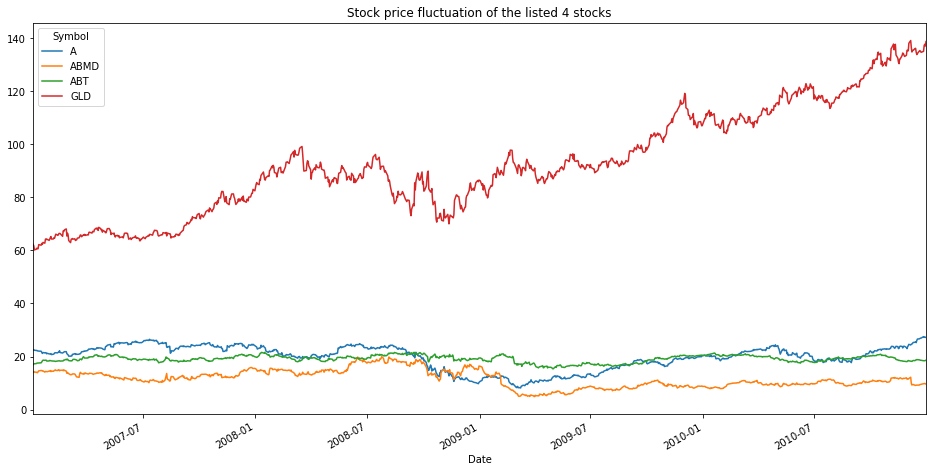

In [17]:
# Plot price of stock throughout the years
all_data_pivoting.plot(figsize=(16,8))
plt.title('Stock price fluctuation of the listed 4 stocks')

Text(0.5, 1.0, 'Trading volume of GLD')

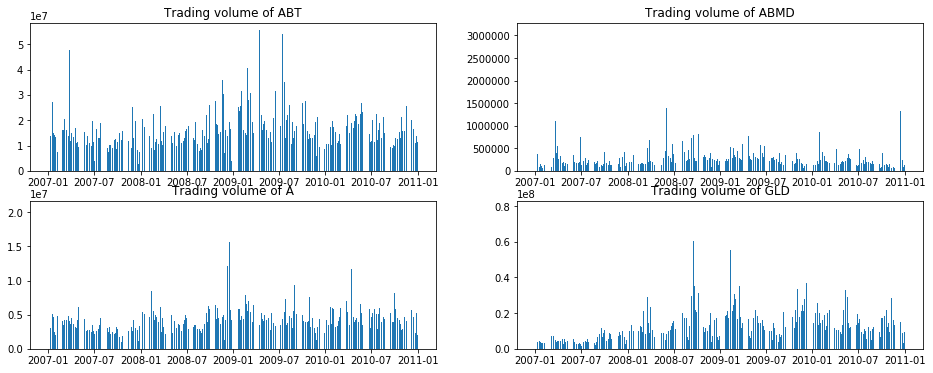

In [22]:
# Observe traded volume of stocks 
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
ABT_volume= all_data.Volume.loc['ABT']
plt.bar(ABT_volume.index, ABT_volume)
plt.title('Trading volume of ABT')

plt.subplot(2,2,2)
ABMD_volume= all_data.Volume.loc['ABMD']
plt.bar(ABMD_volume.index, ABMD_volume)
plt.title('Trading volume of ABMD')

plt.subplot(2,2,3)
A_volume= all_data.Volume.loc['A']
plt.bar(A_volume.index, A_volume)
plt.title('Trading volume of A')

plt.subplot(2,2,4)
GLD_volume= all_data.Volume.loc['GLD']
plt.bar(GLD_volume.index, GLD_volume)
plt.title('Trading volume of GLD')

# Conclusion
# ABMD trading volume is least among all stock(10^6) , stock less liquid compared to other 3 stocks(10^7)

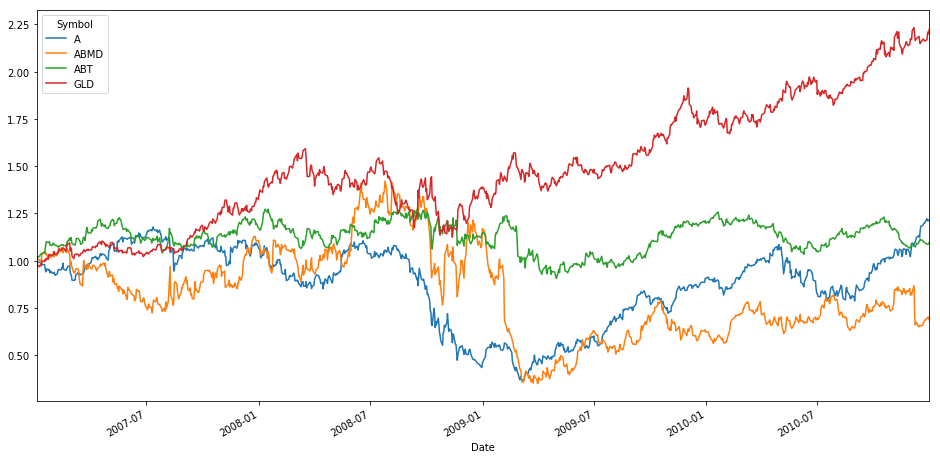

In [23]:
# % change in stock price daily in terms of cumulative returns
daily_price_change= all_data_pivoting.pct_change()
daily_price_change.fillna(0, inplace=True)
daily_cum_return= (1 + daily_price_change).cumprod()
daily_cum_return.plot(figsize=(16,8))

# Conclusion
# ABMD returns seemed to be fluctuating the most, implying higher volatility

Text(0.5, 1.0, 'Histograme of GLD returns')

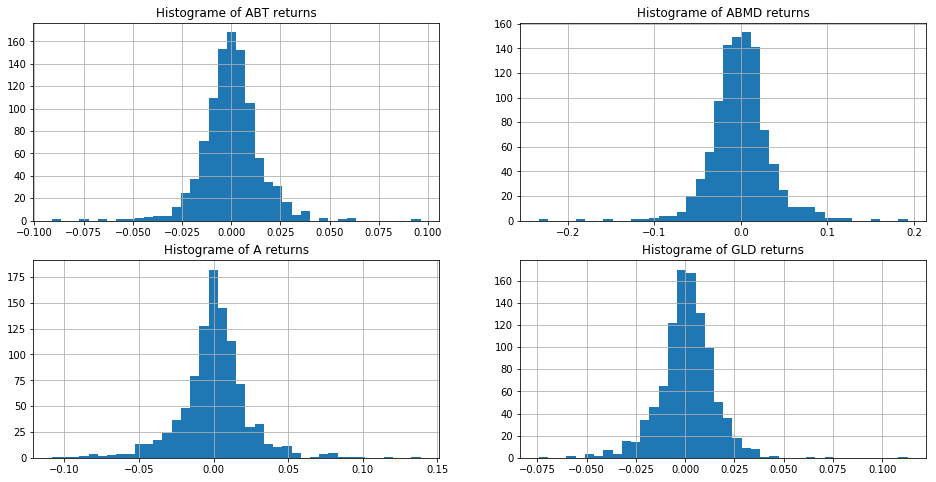

In [24]:
# Plot of histogram of returns(% price change)
ABT_pct_change= daily_price_change['ABT']
ABMD_pct_change= daily_price_change['ABMD']
A_pct_change= daily_price_change['A']
GLD_pct_change= daily_price_change['GLD']

plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
ABT_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of ABT returns')

plt.subplot(2,2,2)
ABMD_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of ABMD returns')

plt.subplot(2,2,3)
A_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of A returns')

plt.subplot(2,2,4)
GLD_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of GLD returns')

# Conclusion
# All stock retrns seem normally distribution with mean being approx 0
# Histogram of ABMD has the widest interval, thus considered being more volatile
# Histogram of ABMD has the second widest interval after ABMD
# Histogram of ABt and GLD seem to have approx similar widths, both having smallest width of all four histogram
# This can confirmed by observing 95% CI of stock returns

In [25]:
# Basic description of ABT(% price change)
ABT_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of ABT is (-0.026315, 0.029186)
# Width of CI is 0.055501 (first ranking(smallest) width, better precision)

count    1008.000000
mean        0.000200
std         0.014613
min        -0.091156
2.5%       -0.026315
50%         0.000000
97.5%       0.029186
max         0.096259
Name: ABT, dtype: float64

In [26]:
# Basic description of ABMD(% price change)
ABMD_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of ABMD is (-0.060533, 0.075146)
# Width of CI is 0.135679 (fourth ranking in width)

count    1008.000000
mean        0.000196
std         0.033747
min        -0.233776
2.5%       -0.060533
50%         0.000000
97.5%       0.075146
max         0.192876
Name: ABMD, dtype: float64

In [27]:
# Basic description of A(% price change)
A_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of A is (-0.050396, 0.049332)
# Width of CI is 0.099728 (third ranking in width)

count    1008.000000
mean        0.000470
std         0.023805
min        -0.108450
2.5%       -0.050396
50%         0.000854
97.5%       0.049331
max         0.138790
Name: A, dtype: float64

In [28]:
# Basic description of GLD(% price change)
GLD_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of GLD is (-0.029987, 0.027157)
# Width of CI is 0.057144 (second ranking width)

count    1008.000000
mean        0.000898
std         0.014393
min        -0.074305
2.5%       -0.029987
50%         0.001144
97.5%       0.027157
max         0.112905
Name: GLD, dtype: float64

<Figure size 432x288 with 0 Axes>

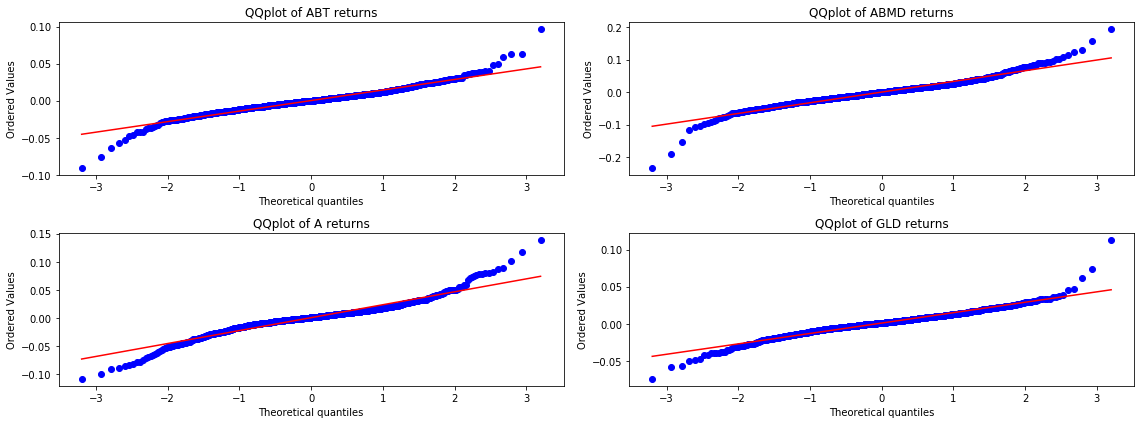

In [66]:
#Plot QQ plot of stocks
plt.clf()
plt.figure(figsize=(16,6))
ax=plt.subplot(2,2,1)
stats.probplot(ABT_pct_change, dist='norm', plot=ax)
plt.title('QQplot of ABT returns')

ax=plt.subplot(2,2,2)
stats.probplot(ABMD_pct_change, dist='norm', plot=ax)
plt.title('QQplot of ABMD returns')

ax=plt.subplot(2,2,3)
stats.probplot(A_pct_change, dist='norm', plot=ax)
plt.title('QQplot of A returns')

ax=plt.subplot(2,2,4)
stats.probplot(GLD_pct_change, dist='norm', plot=ax)
plt.title('QQplot of GLD returns')
plt.tight_layout()

In [75]:
# Prove that all 4 stocks exhibit weak stationary property
# % price change splitted into 3 intervals where mean and variance of each interval is compared
# stock sequence in 'ABT', 'ABMD', 'A', 'GLD'
for tick in symbols:
    x=daily_price_change[tick].values
    one_third_datapoint=round(len(x)/3)
    two_third_datapoint=(one_third_datapoint*2)

    data1, data2, data3=x[0:one_third_datapoint], x[one_third_datapoint:two_third_datapoint], x[two_third_datapoint:] 
    mean1, mean2, mean3=data1.mean(), data2.mean(), data3.mean()
    var1, var2, var3=data1.var(), data2.var(), data3.var()
    print(tick)
    print('mean1')
    print(mean1)
    print('mean2')
    print(mean2)
    print('mean3')
    print(mean3)

    print('var1')
    print(var1)
    print('var2')
    print(var2)
    print('var3')
    print(var3)
    print('\n')

    # mean and variace of stocks seem to remain vary within small range only
    # weak stationarity not certain until ACF correlogram seen

ABT
mean1
0.000432665529458944
mean2
-0.0001773093428672926
mean3
0.00034414351425024204
var1
0.0001628077586681379
var2
0.0003910534492639462
var3
8.58813006607699e-05


ABMD
mean1
0.0006815406892881781
mean2
-0.0010126533109207146
mean3
0.0009183740281931075
var1
0.0008584832952317249
var2
0.001842035663208667
var3
0.0007104856293265199


A
mean1
-4.8290169931985916e-05
mean2
-0.00011512220736981567
mean3
0.0015748784210535347
var1
0.0003013624573289171
var2
0.0010550354777596953
var3
0.0003400725007504077


GLD
mean1
0.0009868733446160433
mean2
0.0004862929597928179
mean3
0.0012211147922458249
var1
0.00015063844126052115
var2
0.00035216591759834197
var3
0.00011773044951462082




<Figure size 432x288 with 0 Axes>

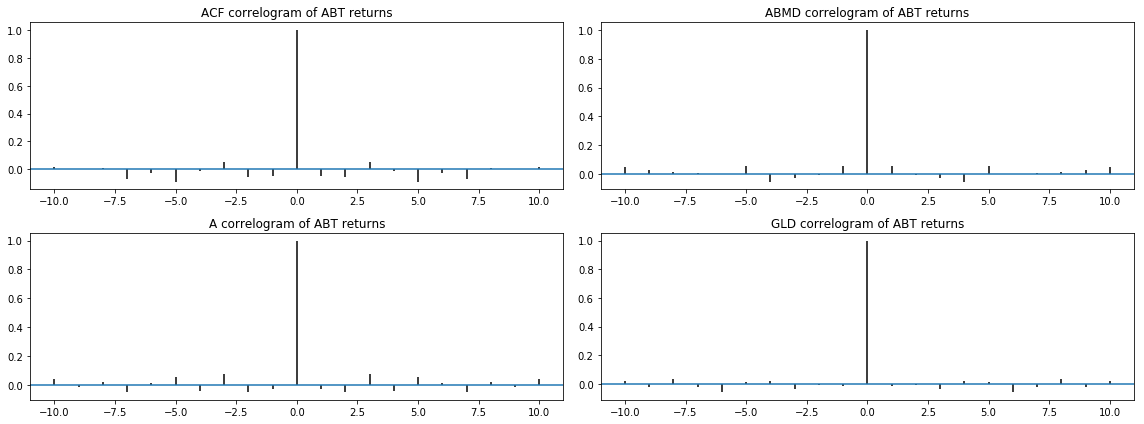

In [73]:
# Plot ACF correlogram to determine if stock exhibit weak stationarity 
plt.clf()
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
plt.acorr(daily_price_change['ABT'])
plt.title('ACF correlogram of ABT returns')

plt.subplot(2,2,2)
plt.acorr(daily_price_change['ABMD'])
plt.title('ABMD correlogram of ABT returns')

plt.subplot(2,2,3)
plt.acorr(daily_price_change['A'])
plt.title('A correlogram of ABT returns')

plt.subplot(2,2,4)
plt.acorr(daily_price_change['GLD'])
plt.title('GLD correlogram of ABT returns')
plt.tight_layout()

# ACF decreases quickly for all stocks
# This implies that the  stocks have weak stationarity